### 선형 회기를 텐서플로우와 케라스를 통해 구현

### 1. 자동 미분

In [1]:
import tensorflow as tf

In [2]:
w = tf.Variable(2.)
w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0>

In [4]:
# y = 2w^2 + 5
def f(w):
  y = w**2
  z = 2*y + 5
  return z

In [5]:
with tf.GradientTape() as tape:
    z = f(w)

In [6]:
# 여기서 tape_gradient()는 자ㅗㅇ 미분 기능
gradients = tape.gradient(z,[w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


### 2. 자동 미분을 이용한 선형 회귀 구현

In [7]:
w = tf.Variable(4.0)
b = tf.Variable(1.0)

In [8]:
@tf.function 
def hypothesis(x):
    return w*x +b 

In [10]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [11]:
@tf.function 
def mse_loss(y_pred,y):
    # 두 개의 차이값을 제곱을 해서 평균을 return
    return tf.reduce_mean(tf.square(y_pred-y))

In [12]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

In [13]:
optimizer = tf.optimizers.SGD(0.01)

In [16]:
for i in range(1001):
  with tf.GradientTape() as tape:
    # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
    y_pred = hypothesis(x)

    # 평균 제곱 오차를 계산
    cost = mse_loss(y_pred, y)

  # 손실 함수에 대한 파라미터의 미분값 계산
  gradients = tape.gradient(cost, [w, b])

  # 파라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [w, b]))

  if i % 50 == 0:
    print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

epoch :   0 | w의 값 : 10.6671 | b의 값 : 0.908 | cost : 1.062102
epoch :  50 | w의 값 : 10.6701 | b의 값 : 0.8889 | cost : 1.061354
epoch : 100 | w의 값 : 10.6725 | b의 값 : 0.8734 | cost : 1.060852
epoch : 150 | w의 값 : 10.6746 | b의 값 : 0.8608 | cost : 1.060523
epoch : 200 | w의 값 : 10.6762 | b의 값 : 0.8505 | cost : 1.060305
epoch : 250 | w의 값 : 10.6775 | b의 값 : 0.8422 | cost : 1.060160
epoch : 300 | w의 값 : 10.6786 | b의 값 : 0.8354 | cost : 1.060062
epoch : 350 | w의 값 : 10.6795 | b의 값 : 0.8298 | cost : 1.060000
epoch : 400 | w의 값 : 10.6802 | b의 값 : 0.8253 | cost : 1.059960
epoch : 450 | w의 값 : 10.6808 | b의 값 : 0.8216 | cost : 1.059933
epoch : 500 | w의 값 : 10.6813 | b의 값 : 0.8186 | cost : 1.059910
epoch : 550 | w의 값 : 10.6816 | b의 값 : 0.8162 | cost : 1.059900
epoch : 600 | w의 값 : 10.6820 | b의 값 : 0.8142 | cost : 1.059889
epoch : 650 | w의 값 : 10.6822 | b의 값 : 0.8126 | cost : 1.059883
epoch : 700 | w의 값 : 10.6824 | b의 값 : 0.8113 | cost : 1.059886
epoch : 750 | w의 값 : 10.6826 | b의 값 : 0.8102 | cost : 1.

### Kears로 구현하는 선형 회귀

예시 코드

model = Sequential() <- Sequential()을 사용하여 모델을 만들어줌

model.add(keras.layers.Dense(1, input_dim=1)) <- add를 통해 입력과 출력 벡터의 차원과 같은 필요한 정보를 추가


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [18]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

In [19]:
model = Sequential()

# 출력 y의 차원은 1. 입력 x의 차원(input_dim)은 1
# 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

In [20]:
# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

In [21]:
# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

In [22]:
# 주어진 x와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(x, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 236ms/step - loss: 3581.2705 - mse: 3581.2705
Epoch 2/300
1/1 [==============================] - 0s 4ms/step - loss: 441.7077 - mse: 441.7077
Epoch 3/300
1/1 [==============================] - 0s 4ms/step - loss: 55.4071 - mse: 55.4071
Epoch 4/300
1/1 [==============================] - 0s 5ms/step - loss: 7.8747 - mse: 7.8747
Epoch 5/300
1/1 [==============================] - 0s 11ms/step - loss: 2.0251 - mse: 2.0251
Epoch 6/300
1/1 [==============================] - 0s 5ms/step - loss: 1.3044 - mse: 1.3044
Epoch 7/300
1/1 [==============================] - 0s 281us/step - loss: 1.2146 - mse: 1.2146
Epoch 8/300
1/1 [==============================] - 0s 2ms/step - loss: 1.2026 - mse: 1.2026
Epoch 9/300
1/1 [==============================] - 0s 0s/step - loss: 1.2001 - mse: 1.2001
Epoch 10/300
1/1 [==============================] - 0s 0s/step - loss: 1.1988 - mse: 1.1988
Epoch 11/300
1/1 [==============================] - 0s 12ms/step

1/1 [==============================] - 0s 41ms/step


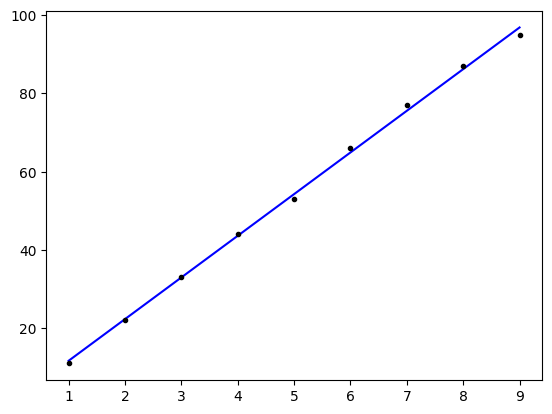

In [23]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

In [24]:
print(model.predict([9.5]))

1/1 [==============================] - 0s 28ms/step
[[102.17223]]
